### [  산점도 그래프  ]
- 두개의 컬럼(변수)의 관계를 시각화해서 표현
- 연속형(수치형)데이터에 사용함

In [23]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# [2] 데이터 준비
F_DATA=r'C:\Users\KDP-14\Desktop\EX_PANDAS6\DAY04\auto_mpg.csv'

In [25]:
# [3] CSV => DataFrame으로 저장
dataDF=pd.read_csv(F_DATA)
dataDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [26]:
# - 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [27]:
# [4] 연비와 관련이 높은 컬럼 즉, 변수 확인
# - [4-1] 상관계수 확인
corrSR=dataDF.corr(numeric_only=True)['mpg'] # weight가 관계가 가장 높음.
round(corrSR['weight'],2), corrSR

(-0.83,
 mpg             1.000000
 cylinders      -0.775396
 displacement   -0.804203
 weight         -0.831741
 acceleration    0.420289
 model year      0.579267
 origin          0.563450
 Name: mpg, dtype: float64)

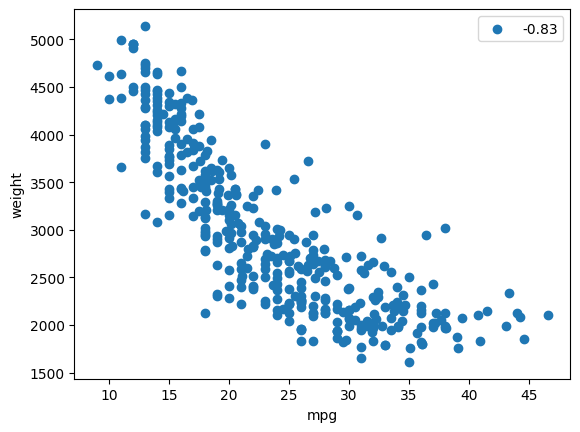

In [28]:
# - [4-2] 시각화
plt.scatter(dataDF.mpg,dataDF.weight,label=(round(corrSR['weight'],2)))
#                 x          y
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

In [29]:
# - [4-3] mpg 컬럼과 다른 컬럼과의 관계 시각화
corrSR.index

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [30]:
# for i in range(len(corrSR.index)-1):

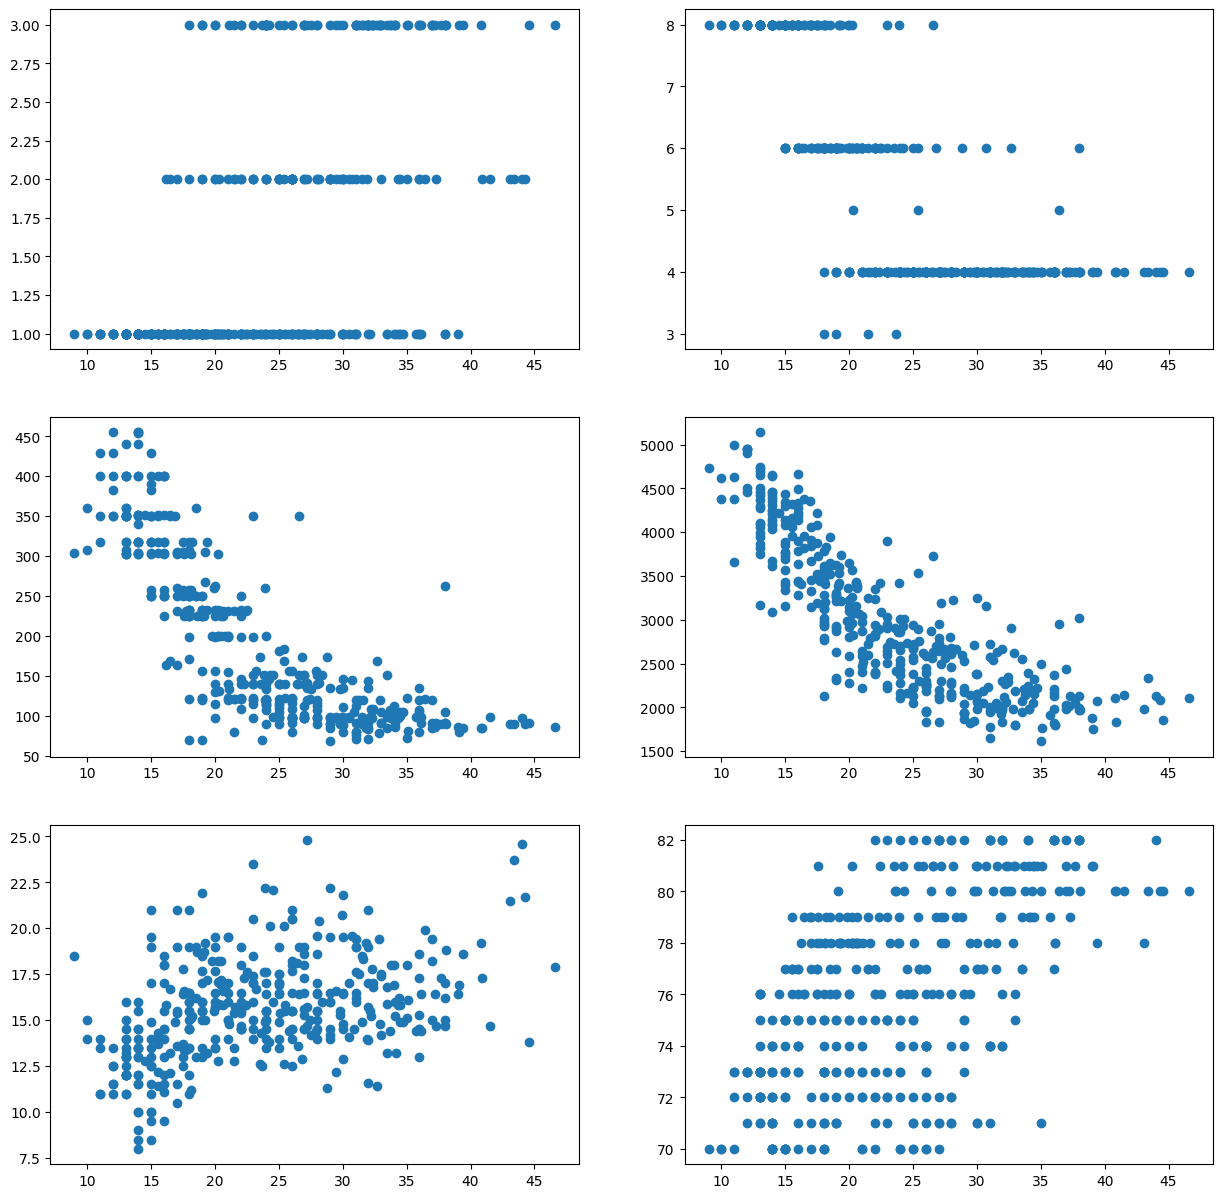

In [31]:
fig=plt.figure(figsize=(15,15))
axes=fig.subplots(3,2)
c_index=[['origin', 'cylinders'],
        ['displacement', 'weight'],
        ['acceleration','model year']]

for a in range(len(axes)):
    for b in range(len(axes)-1):
        axes[a][b].scatter(dataDF.mpg,dataDF[c_index[a][b]])



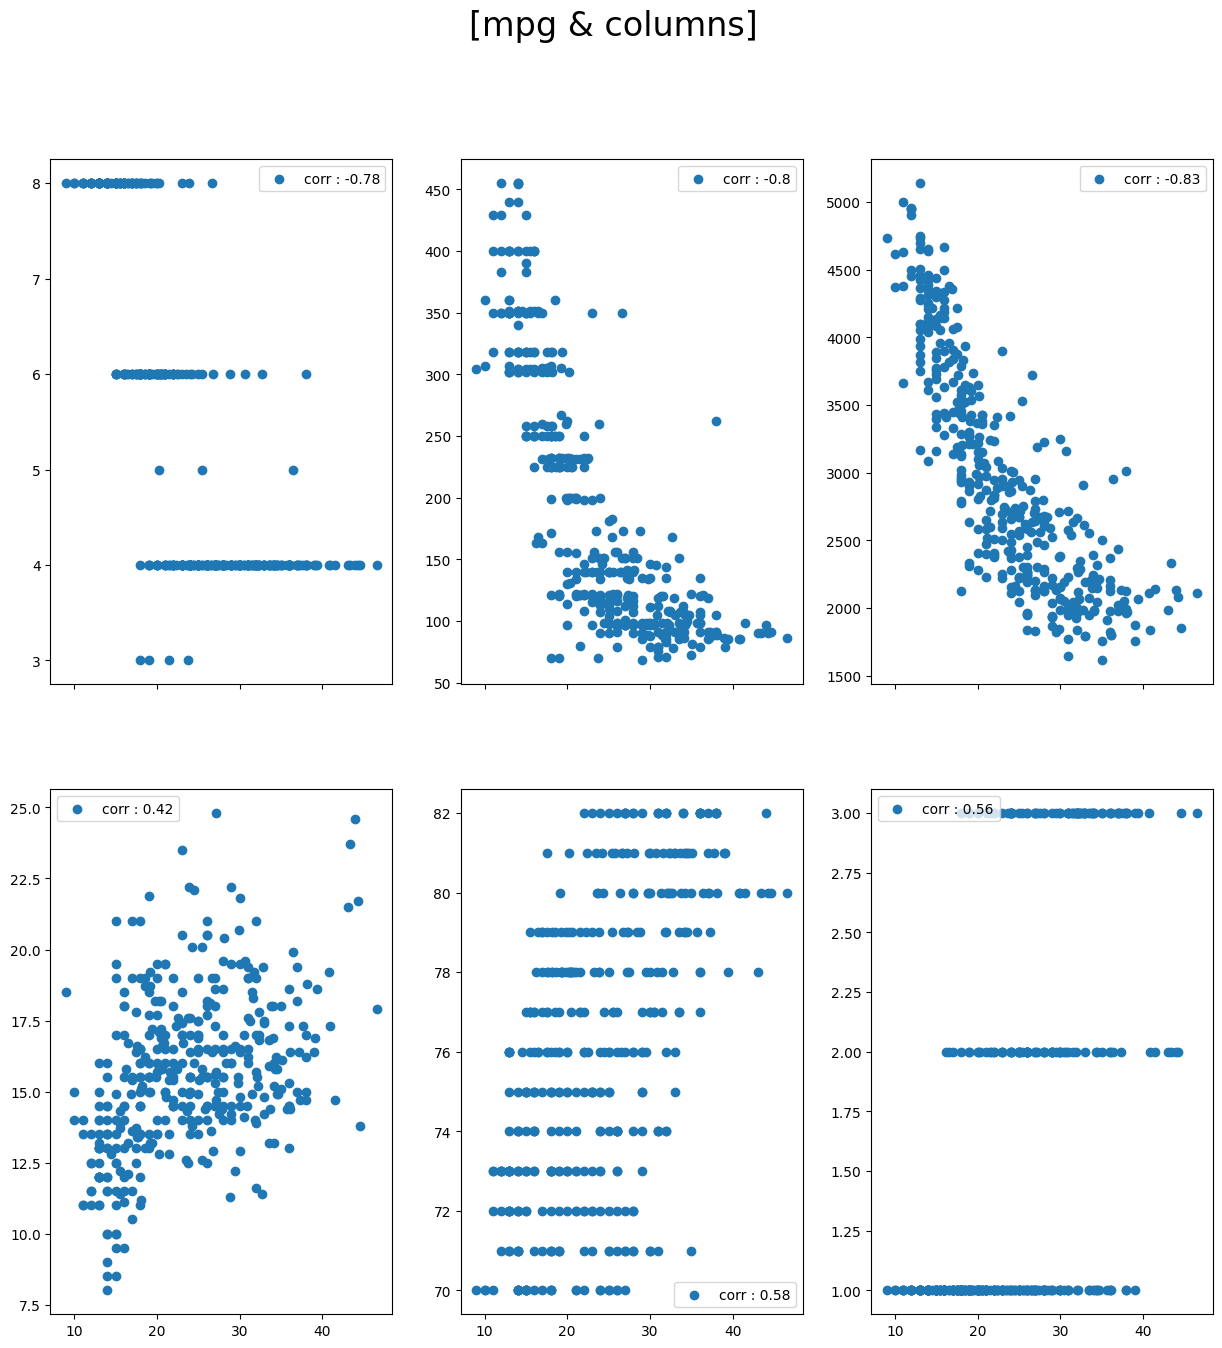

In [36]:
# - [4-3] mpg 컬럼과 다른 컬럼과의 관계 시각화
# - (1) 그래프 담을 창 생성
fig=plt.figure(figsize=(15,15))

# - (2) 그래프 담을 공간 생성 axes
axs=fig.subplots(2,3,sharex=True)
for row in range(2):
    for col in range(3):
        col_name=corrSR.index[row*3+col+1]
        axs[row,col].scatter(dataDF['mpg'],
                             dataDF[col_name],
                             label=f'corr : {round(corrSR[col_name],2)}')
        axs[row,col].legend()
        
fig.suptitle("[mpg & columns]",fontsize=24)
plt.show()
        